<a href="https://colab.research.google.com/github/farshahid04/AHI-Diabetes-Data/blob/main/NOVA_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import seaborn as sns


In [116]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [117]:
%%R
x <- 42
print(x)

[1] 42


In [118]:
%%R -i df
df2 <- df
df$encounter_id


NULL


In [119]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Breast Cancer Coimbra Data Set varible

DV = Insulin 

IV Factor I = Glucose

IV Factor II= Age

Quantitative Attributes:
Age (years)

BMI (kg/m2)

Glucose (mg/dL)

Insulin (µU/mL)

HOMA

Leptin (ng/mL)

Adiponectin (µg/mL)

Resistin (ng/mL)

MCP-1(pg/dL)

Labels:
1=Healthy controls

2=Patients



In [122]:
import seaborn as sns

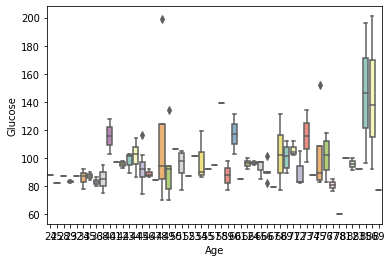

In [121]:
# generate a boxplot to see the data distribution by Glucose and BMI. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Age", y="Glucose", data=df, palette="Set3") 

In [123]:
list(df)

['Age',
 'BMI',
 'Glucose',
 'Insulin',
 'HOMA',
 'Leptin',
 'Adiponectin',
 'Resistin',
 'MCP.1',
 'Classification']

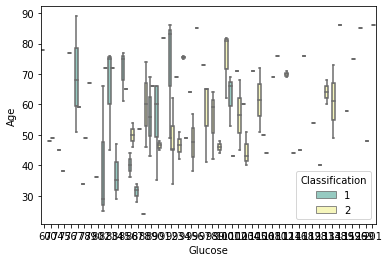

In [124]:
sns.boxplot(x="Glucose", y="Age", hue='Classification', data=df, palette="Set3") 


In [125]:
df.Insulin.describe()

count    116.000000
mean      10.012086
std       10.067768
min        2.432000
25%        4.359250
50%        5.924500
75%       11.189250
max       58.460000
Name: Insulin, dtype: float64

In [126]:
def my_recode(insulinvariable):
    if insulinvariable <= 5.92:
        return 'Low'
    else:
        return 'High'

In [127]:
df['insulin2'] = df['Insulin'].apply(my_recode)


In [128]:
df['insulin2']

0       Low
1       Low
2       Low
3       Low
4       Low
       ... 
111     Low
112     Low
113     Low
114     Low
115    High
Name: insulin2, Length: 116, dtype: object

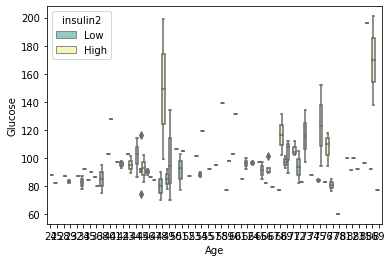

In [129]:
sns.boxplot(x="Age", y="Glucose", hue='insulin2', data=df, palette="Set3") 


In [152]:
workingdf = df [['Glucose', 'Classification', 'Age']]

In [153]:
workingdf

,Glucose,Classification,Age
0,70,1,48
1,92,1,83
2,91,1,82
3,77,1,68
4,92,1,86
...,...,...,...
111,92,2,45
112,100,2,62
113,97,2,65
114,82,2,72


In [154]:
descriptive = workingdf.describe()
descriptive

,Glucose,Classification,Age
count,116.000000,116.000000,116.000000
mean,97.793103,1.551724,57.301724
std,22.525162,0.499475,16.112766
min,60.000000,1.000000,24.000000
25%,85.750000,1.000000,45.000000
50%,92.000000,2.000000,56.000000
75%,102.000000,2.000000,71.000000
max,201.000000,2.000000,89.000000


In [155]:
Glucose_counts = workingdf['Glucose'].value_counts()

In [156]:
Glucose_counts

92     9
90     6
97     4
77     4
82     4
83     4
85     4
86     4
87     4
103    4
101    4
88     3
84     3
89     3
93     3
94     3
95     3
98     3
100    3
102    3
106    2
112    2
99     2
131    2
78     2
70     2
105    2
134    2
201    1
199    1
60     1
138    1
139    1
75     1
152    1
196    1
74     1
119    1
76     1
79     1
80     1
118    1
91     1
96     1
104    1
108    1
110    1
114    1
116    1
128    1
Name: Glucose, dtype: int64

In [157]:
Age_counts = workingdf['Age'].value_counts()

In [158]:
Age_counts

45    7
49    5
66    5
69    5
48    4
51    4
76    4
75    4
44    4
68    3
46    3
43    3
54    3
86    3
34    3
65    3
71    3
72    3
85    2
82    2
42    2
29    2
40    2
77    2
38    2
36    2
59    2
60    2
35    2
62    2
64    2
73    2
32    1
41    1
28    1
25    1
89    1
57    1
47    1
50    1
52    1
53    1
55    1
58    1
61    1
67    1
74    1
78    1
81    1
83    1
24    1
Name: Age, dtype: int64

In [159]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [162]:
ols('Classification ~ C(Age) + C(Glucose)' , data=workingdf).fit()
model = ols('Classification ~ C(Age) + C(Glucose)', data=workingdf).fit()


In [163]:
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Age),12.284282,50.0,1.119552,0.403885
C(Glucose),11.768145,49.0,1.094401,0.426949
Residual,4.388998,20.0,NaN,NaN


In [164]:
!pip install bioinfokit

In [165]:
from bioinfokit.analys import stat 

In [166]:
res = stat()

In [184]:
res.tukey_hsd (df=workingdf, res_var='Classification', xfac_var='Age', anova_model='Classification~C(Age)+C(Glucose)+C(Age):C(Glucose)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1768: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 49, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2450, but rank is 111
  'rank is %d' % (J, J_), ValueWarning)


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,48,83,0.750000,7.500000e-01,7.500000e-01,8.048894e+13,0.001
1,48,82,0.250000,2.500000e-01,2.500000e-01,3.463693e+13,0.001
2,48,68,0.083333,8.333333e-02,8.333333e-02,1.309153e+13,0.001
3,48,86,0.083333,8.333333e-02,8.333333e-02,1.309153e+13,0.001
4,48,49,0.050000,5.000000e-02,5.000000e-02,8.943216e+12,0.001
...,...,...,...,...,...,...,...
1270,40,74,0.000000,-1.368274e-13,1.368274e-13,0.000000e+00,0.900
1271,40,57,0.000000,-1.368274e-13,1.368274e-13,0.000000e+00,0.900
1272,52,74,0.000000,-1.579946e-13,1.579946e-13,0.000000e+00,0.900
1273,52,57,0.000000,-1.579946e-13,1.579946e-13,0.000000e+00,0.900


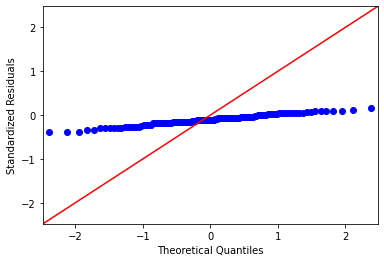

In [185]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


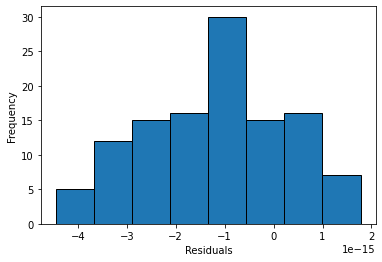

In [186]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [187]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.981805682182312 0.11731895804405212


In [189]:
# if you have  a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=workingdf, res_var='Classification', xfac_var=['Age', 'Glucose'])
res.levene_summary

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Parameter,Value
0,Test statistics (W),NaN
1,Degrees of freedom (Df),2549.0
2,p value,NaN
